In [1]:
!git clone https://github.com/niazwazir/TestImage.git

Cloning into 'TestImage'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 46 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [0]:
import torch
from torch import nn
from torchsummary import summary

In [0]:
class BasicConv2d(nn.Module):

    def __init__(self, in_planes, out_planes, kernel_size, stride, padding=0):
        super(BasicConv2d, self).__init__()
        self.conv = nn.Conv2d(in_planes, out_planes,
                              kernel_size=kernel_size, stride=stride,
                              padding=padding, bias=False) # verify bias false
        self.bn = nn.BatchNorm2d(out_planes,
                                 eps=0.001, # value found in tensorflow
                                 momentum=0.1, # default pytorch value
                                 affine=True)
        self.relu = nn.ReLU(inplace=False)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x


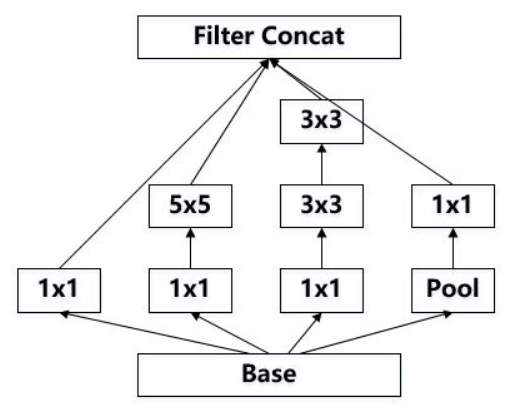

In [4]:
from  IPython.display  import Image
Image('TestImage/InceptionA.png')

In [0]:
class InceptionA(nn.Module):

    def __init__(self, in_channels=1):
        super(InceptionA, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, 64, kernel_size=1,stride=1) # 1

        self.branch5x5_1 = BasicConv2d(in_channels, 48, kernel_size=1,stride=1)
        self.branch5x5_2 = BasicConv2d(48, 64, kernel_size=5, padding=2,stride=1)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1,stride=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1,stride=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, padding=1,stride=1)

        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        
        outputs = [branch1x1, branch5x5, branch3x3dbl]
        return torch.cat(outputs, 1)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = InceptionA().to(device)
summary(model, (1, 192,192))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 192, 192]              64
       BatchNorm2d-2         [-1, 64, 192, 192]             128
              ReLU-3         [-1, 64, 192, 192]               0
       BasicConv2d-4         [-1, 64, 192, 192]               0
            Conv2d-5         [-1, 48, 192, 192]              48
       BatchNorm2d-6         [-1, 48, 192, 192]              96
              ReLU-7         [-1, 48, 192, 192]               0
       BasicConv2d-8         [-1, 48, 192, 192]               0
            Conv2d-9         [-1, 64, 192, 192]          76,800
      BatchNorm2d-10         [-1, 64, 192, 192]             128
             ReLU-11         [-1, 64, 192, 192]               0
      BasicConv2d-12         [-1, 64, 192, 192]               0
           Conv2d-13         [-1, 64, 192, 192]              64
      BatchNorm2d-14         [-1, 64, 1

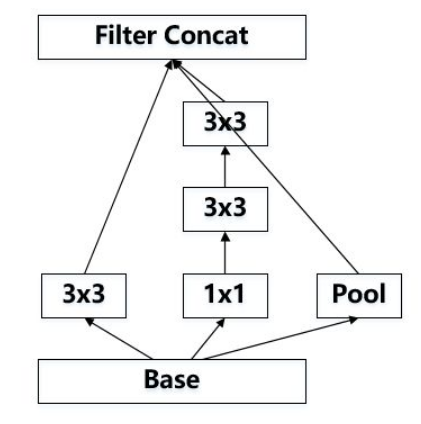

In [7]:
from  IPython.display  import Image
Image('TestImage/InceptionB.png')

In [0]:
class InceptionB(nn.Module):

    def __init__(self, in_channels=1):
        super(InceptionB, self).__init__()
        self.branch3x3 = BasicConv2d(in_channels, 384, kernel_size=3, stride=2)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1,stride=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1,stride=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3(x)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        
        outputs = [branch3x3, branch3x3dbl]
        return torch.cat(outputs, 1)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = InceptionB().to(device)
summary(model, (1, 384,384))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 384, 191, 191]           3,456
       BatchNorm2d-2        [-1, 384, 191, 191]             768
              ReLU-3        [-1, 384, 191, 191]               0
       BasicConv2d-4        [-1, 384, 191, 191]               0
            Conv2d-5         [-1, 64, 384, 384]              64
       BatchNorm2d-6         [-1, 64, 384, 384]             128
              ReLU-7         [-1, 64, 384, 384]               0
       BasicConv2d-8         [-1, 64, 384, 384]               0
            Conv2d-9         [-1, 96, 384, 384]          55,296
      BatchNorm2d-10         [-1, 96, 384, 384]             192
             ReLU-11         [-1, 96, 384, 384]               0
      BasicConv2d-12         [-1, 96, 384, 384]               0
           Conv2d-13         [-1, 96, 191, 191]          82,944
      BatchNorm2d-14         [-1, 96, 1

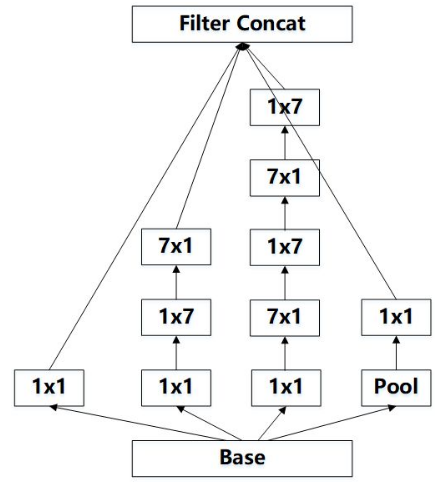

In [10]:
from  IPython.display  import Image
Image('TestImage/InceptionC.png')

In [0]:
class InceptionC(nn.Module):

    def __init__(self, in_channels=1 , channels_7x7 = 7):
        super(InceptionC, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, 192, kernel_size=1, stride =1)

        c7 = channels_7x7
        self.branch7x7_1 = BasicConv2d(in_channels, c7, kernel_size=1,stride=1)
        self.branch7x7_2 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3),stride=1)
        self.branch7x7_3 = BasicConv2d(c7, 192, kernel_size=(7, 1), padding=(3, 0),stride=1)

        self.branch7x7dbl_1 = BasicConv2d(in_channels, c7, kernel_size=1,stride=1)
        self.branch7x7dbl_2 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0),stride=1)
        self.branch7x7dbl_3 = BasicConv2d(c7, c7, kernel_size=(1, 7), padding=(0, 3),stride=1)
        self.branch7x7dbl_4 = BasicConv2d(c7, c7, kernel_size=(7, 1), padding=(3, 0),stride=1)
        self.branch7x7dbl_5 = BasicConv2d(c7, 192, kernel_size=(1, 7), padding=(0, 3),stride=1)

        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1,stride=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)

        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)

     

        outputs = [branch1x1, branch7x7, branch7x7dbl]
        return torch.cat(outputs, 1)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = InceptionC().to(device)
summary(model, (1, 192,192))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 192, 192, 192]             192
       BatchNorm2d-2        [-1, 192, 192, 192]             384
              ReLU-3        [-1, 192, 192, 192]               0
       BasicConv2d-4        [-1, 192, 192, 192]               0
            Conv2d-5          [-1, 7, 192, 192]               7
       BatchNorm2d-6          [-1, 7, 192, 192]              14
              ReLU-7          [-1, 7, 192, 192]               0
       BasicConv2d-8          [-1, 7, 192, 192]               0
            Conv2d-9          [-1, 7, 192, 192]             343
      BatchNorm2d-10          [-1, 7, 192, 192]              14
             ReLU-11          [-1, 7, 192, 192]               0
      BasicConv2d-12          [-1, 7, 192, 192]               0
           Conv2d-13        [-1, 192, 192, 192]           9,408
      BatchNorm2d-14        [-1, 192, 1

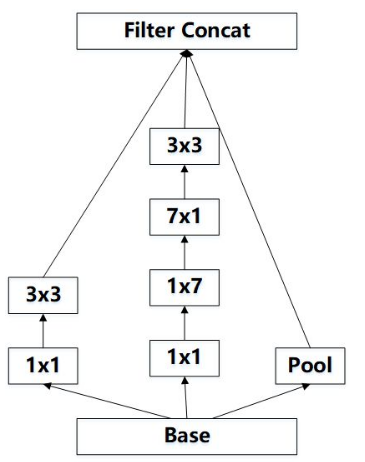

In [13]:
from  IPython.display  import Image
Image('TestImage/InceptionD.png')

In [0]:
class InceptionD(nn.Module):

    def __init__(self, in_channels=1):
        super(InceptionD, self).__init__()
        self.branch3x3_1 = BasicConv2d(in_channels, 192, kernel_size=1,stride=1)
        self.branch3x3_2 = BasicConv2d(192, 320, kernel_size=3, stride=2)

        self.branch7x7x3_1 = BasicConv2d(in_channels, 192, kernel_size=1,stride=1)
        self.branch7x7x3_2 = BasicConv2d(192, 192, kernel_size=(1, 7), padding=(0, 3),stride=1)
        self.branch7x7x3_3 = BasicConv2d(192, 192, kernel_size=(7, 1), padding=(3, 0),stride=1)
        self.branch7x7x3_4 = BasicConv2d(192, 192, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)

        branch7x7x3 = self.branch7x7x3_1(x)
        branch7x7x3 = self.branch7x7x3_2(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_3(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_4(branch7x7x3)


        outputs = [branch3x3, branch7x7x3]
        return torch.cat(outputs, 1)

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = InceptionD().to(device)
summary(model, (1, 192,192))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 192, 192, 192]             192
       BatchNorm2d-2        [-1, 192, 192, 192]             384
              ReLU-3        [-1, 192, 192, 192]               0
       BasicConv2d-4        [-1, 192, 192, 192]               0
            Conv2d-5          [-1, 320, 95, 95]         552,960
       BatchNorm2d-6          [-1, 320, 95, 95]             640
              ReLU-7          [-1, 320, 95, 95]               0
       BasicConv2d-8          [-1, 320, 95, 95]               0
            Conv2d-9        [-1, 192, 192, 192]             192
      BatchNorm2d-10        [-1, 192, 192, 192]             384
             ReLU-11        [-1, 192, 192, 192]               0
      BasicConv2d-12        [-1, 192, 192, 192]               0
           Conv2d-13        [-1, 192, 192, 192]         258,048
      BatchNorm2d-14        [-1, 192, 1

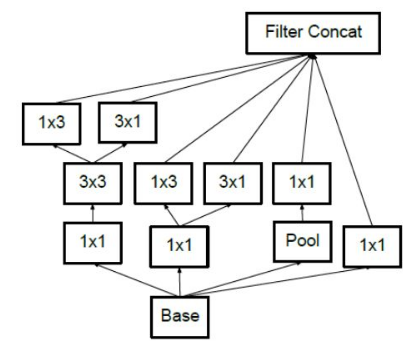

In [16]:
from  IPython.display  import Image
Image('TestImage/InceptionE.png')

In [0]:
class InceptionE(nn.Module):

    def __init__(self, in_channels=1):
        super(InceptionE, self).__init__()
        self.branch1x1 = BasicConv2d(in_channels, 320, kernel_size=1,stride=1)

        self.branch3x3_1 = BasicConv2d(in_channels, 384, kernel_size=1,stride=1)
        self.branch3x3_2a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1),stride=1)
        self.branch3x3_2b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0),stride=1)

        self.branch3x3dbl_1 = BasicConv2d(in_channels, 448, kernel_size=1,stride=1)
        self.branch3x3dbl_2 = BasicConv2d(448, 384, kernel_size=3, padding=1,stride=1)
        self.branch3x3dbl_3a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1),stride=1)
        self.branch3x3dbl_3b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0),stride=1)

        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1,stride=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)

        

        outputs = [branch1x1, branch3x3, branch3x3dbl]
        return torch.cat(outputs, 1)


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
model = InceptionE().to(device)
summary(model, (1, 192,192))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 320, 192, 192]             320
       BatchNorm2d-2        [-1, 320, 192, 192]             640
              ReLU-3        [-1, 320, 192, 192]               0
       BasicConv2d-4        [-1, 320, 192, 192]               0
            Conv2d-5        [-1, 384, 192, 192]             384
       BatchNorm2d-6        [-1, 384, 192, 192]             768
              ReLU-7        [-1, 384, 192, 192]               0
       BasicConv2d-8        [-1, 384, 192, 192]               0
            Conv2d-9        [-1, 384, 192, 192]         442,368
      BatchNorm2d-10        [-1, 384, 192, 192]             768
             ReLU-11        [-1, 384, 192, 192]               0
      BasicConv2d-12        [-1, 384, 192, 192]               0
           Conv2d-13        [-1, 384, 192, 192]         442,368
      BatchNorm2d-14        [-1, 384, 1